<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>

---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section2)<br>
**2.** [**Installing & Importing Libraries**](#Section3)<br>
  - **2.1** [**Installing Libraries**](#Section31)
  - **2.2** [**Importing Libraries**](#Section32)

**3.** [**Data Acquisition & Description**](#Section4)<br>
  - **3.1** [**Data Description**](#Section41)
  - **3.2** [**Data Information**](#Section42)

**4.** [**Exploratory Data Analysis**](#Section6)<br>
**5.** [**Post Data Processing**](#Section7)<br>
  - **5.1** [**Data Standardization**](#Section71)<br>
  - **5.2** [**Data Preparation**](#Section73)<br>

**6.** [**Model Development & Evaluation**](#Section8)<br>
  - **6.1** [**Linear Regression in Scikit-Learn**](#Section81)<br>
  - **6.2** [**Interpreting Model Coefficients**](#Section82)<br>
  - **6.3** [**Using the Model for Prediction**](#Section83)<br>
  - **6.4** [**Model Evaluation**](#section84)<br>
  - **6.5** [**Model Evaluation using R-Squared and adjusted R-squared**](#section85)<br>

**7.** [**Conclusion**](#Section9)<br>



# 1. Problem Statement
---
This **dataset** consists of all **required information about the Abalones** like **Sex, Length, Diameter, Height, Weight, etc.** for **determining the Age of the Abalone**.

<br>

Your role as **Data Scientist** is to find: 

- Build a **Regression Model** using the **given dataset**. 

- Predict the **number of rings** for **each abalone**.

---
# 2. Installing & Importing Libraries
---

<a name = Section31></a>
### **2.1 Installing Libraries**

In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data 
!pip install pandas==0.25

     |████████████████████████████████| 71kB 1.9MB/s 
     |████████████████████████████████| 10.5MB 2.4MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.25.0 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.25.0 which is incompatible.
  Found existing installation: pandas 1.1.2
    Uninstalling pandas-1.1.2:
      Successfully uninstalled pandas-1.1.2


### 2.2. **Importing Packages** 

In [100]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **3. Data Acquisition & Description**
---


- The **age of abalone** is determined by cutting the shell through the cone, staining it, and counting the **number of rings** through a microscope.

- This is a **quite boring** and **time-consuming** task

- Task is to build a **regression model**

- The Data can be retrieved from the attached <a href = "https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv">**link**</a>.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 4177 | 10 | 7.80 KB| 


| Id | Features | Description |
| :-- | :--| :--| 
|01| **ID** | Unique Id of the sample |
|02| **Sex** | The sex of the abalone (M, F, and I (infant)) | 
|03| **Length** | Longest shell measurement (mm) |
|04| **Diameter** | Diameter of abalone perpendicular to length (mm) |
|05| **Height** | Height of abalone with meat in the shell (mm) |
|06| **Whole_weight** | Weight of the whole abalone (grams) |
|07| **Shucked_weight** | Weight of the meat of abalone (grams) |
|08| **Viscera_weight** | Gut weight (after bleeding) of the abalone (grams) |
|09| **Shell_weight** | Weight of the abalone after being dried (grams) |
|10| **Rings** | Number of Rings in the abalone |

In [101]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [102]:
abalone_train = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/Term_3-Machine_Learning_Foundation/ML_Projects/abalone_train.csv') 
print('Data Shape:', abalone_train.shape)
abalone_train.head()

Data Shape: (3341, 10)


,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.18000,0.13500,0.08000,0.03300,0.01450,0.00700,0.01000,5
1,3521,I,0.21500,0.15000,0.05500,0.04100,0.01500,0.00900,0.01250,3
2,883,M,0.66000,0.53000,0.17000,1.39050,0.59050,0.21200,0.45300,15
3,3627,M,0.71500,0.52500,0.20000,1.89000,0.95000,0.43600,0.43050,10
4,2106,M,0.59500,0.45500,0.15500,1.04100,0.41600,0.21050,0.36500,14


- The dataset contains **3341** rows and **10** columns. 

<a name = Section41></a>
### **3.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [103]:
abalone_train.describe(include='all')

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.00000,3341,3341.00000,3341.00000,3341.00000,3341.00000,3341.00000,3341.00000,3341.00000,3341.00000
unique,nan,3,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,M,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,1232,nan,nan,nan,nan,nan,nan,nan,nan
mean,2085.44208,NaN,0.52589,0.40946,0.14013,0.83818,0.36360,0.18251,0.24139,9.95840
std,1197.72185,NaN,0.11976,0.09889,0.04262,0.49379,0.22416,0.11044,0.13983,3.20559
min,0.00000,NaN,0.07500,0.05500,0.00000,0.00200,0.00100,0.00050,0.00150,1.00000
25%,1055.00000,NaN,0.45000,0.35000,0.11500,0.44450,0.18800,0.09350,0.13200,8.00000
50%,2086.00000,NaN,0.54500,0.42500,0.14500,0.81000,0.34150,0.17250,0.23500,10.00000
75%,3114.00000,NaN,0.62000,0.48500,0.16500,1.16850,0.50950,0.25550,0.33000,11.00000


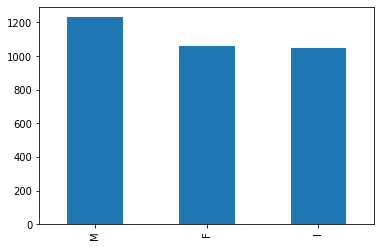

In [104]:
abalone_train['Sex'].value_counts().plot(kind='bar')

In [105]:
abalone_train.duplicated().value_counts()

False    3341
dtype: int64

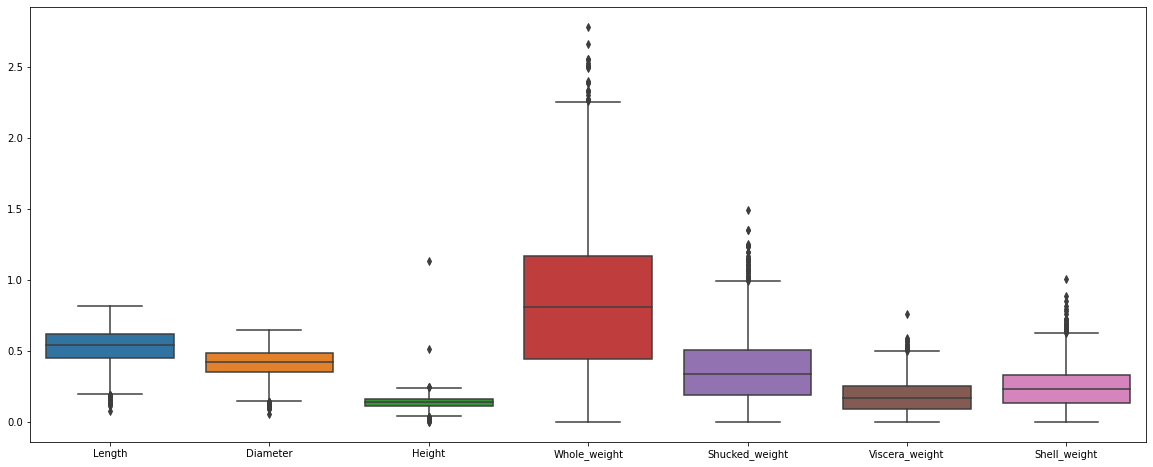

In [106]:
plt.figure(figsize=(20, 8))

sns.boxplot(data=abalone_train[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']])

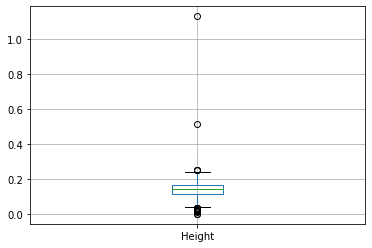

In [107]:
abalone_train.boxplot(column='Height')

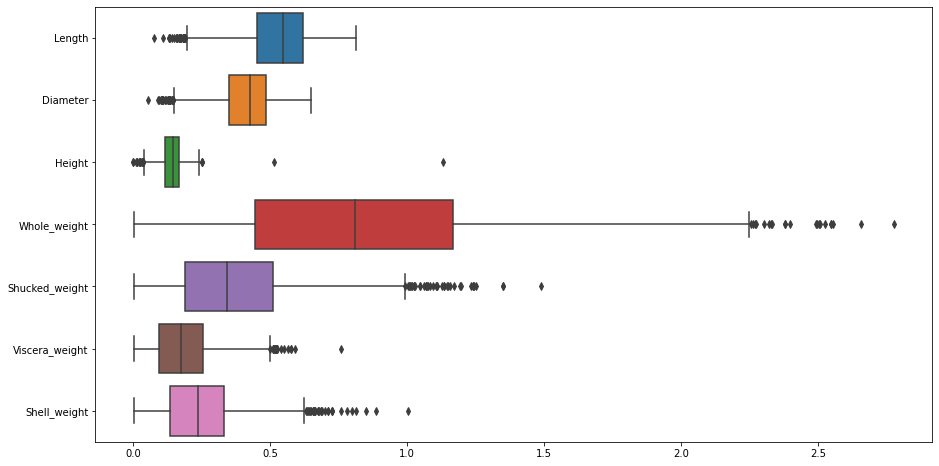

In [108]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=abalone_train[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']], orient='h')

**Observation:**

- There are **no null** values

- **Male Abalones** are more in independent variable **Sex**.

- The **Average Ring size** is **10**.

- The **Maximum Ring size** is **27** and **Minimum Ring size** is **1.00**.

- The **Maximum** & **Minimum Height** is **0.250** & **0.000**.

- The **Maximum** & **Minimum Diameter** is **0.650** & **0.055**

- The **Maximum** & **Minimum Length** is **0.815** & **0.075**


<a name = Section42></a>
### **3.2 Data Information**

- In this section we will see the **information about the types of features**.

In [109]:
abalone_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3341 non-null   int64  
 1   Sex             3341 non-null   object 
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 261.1+ KB


**Observation:**

- There are **no null values present** in this data set.

- **Each feature** seems to have **correct data type**.

<a name = Section6></a>

---
# **4. Exploratory Data Analysis**
---

### Visualising Pairwise correlation

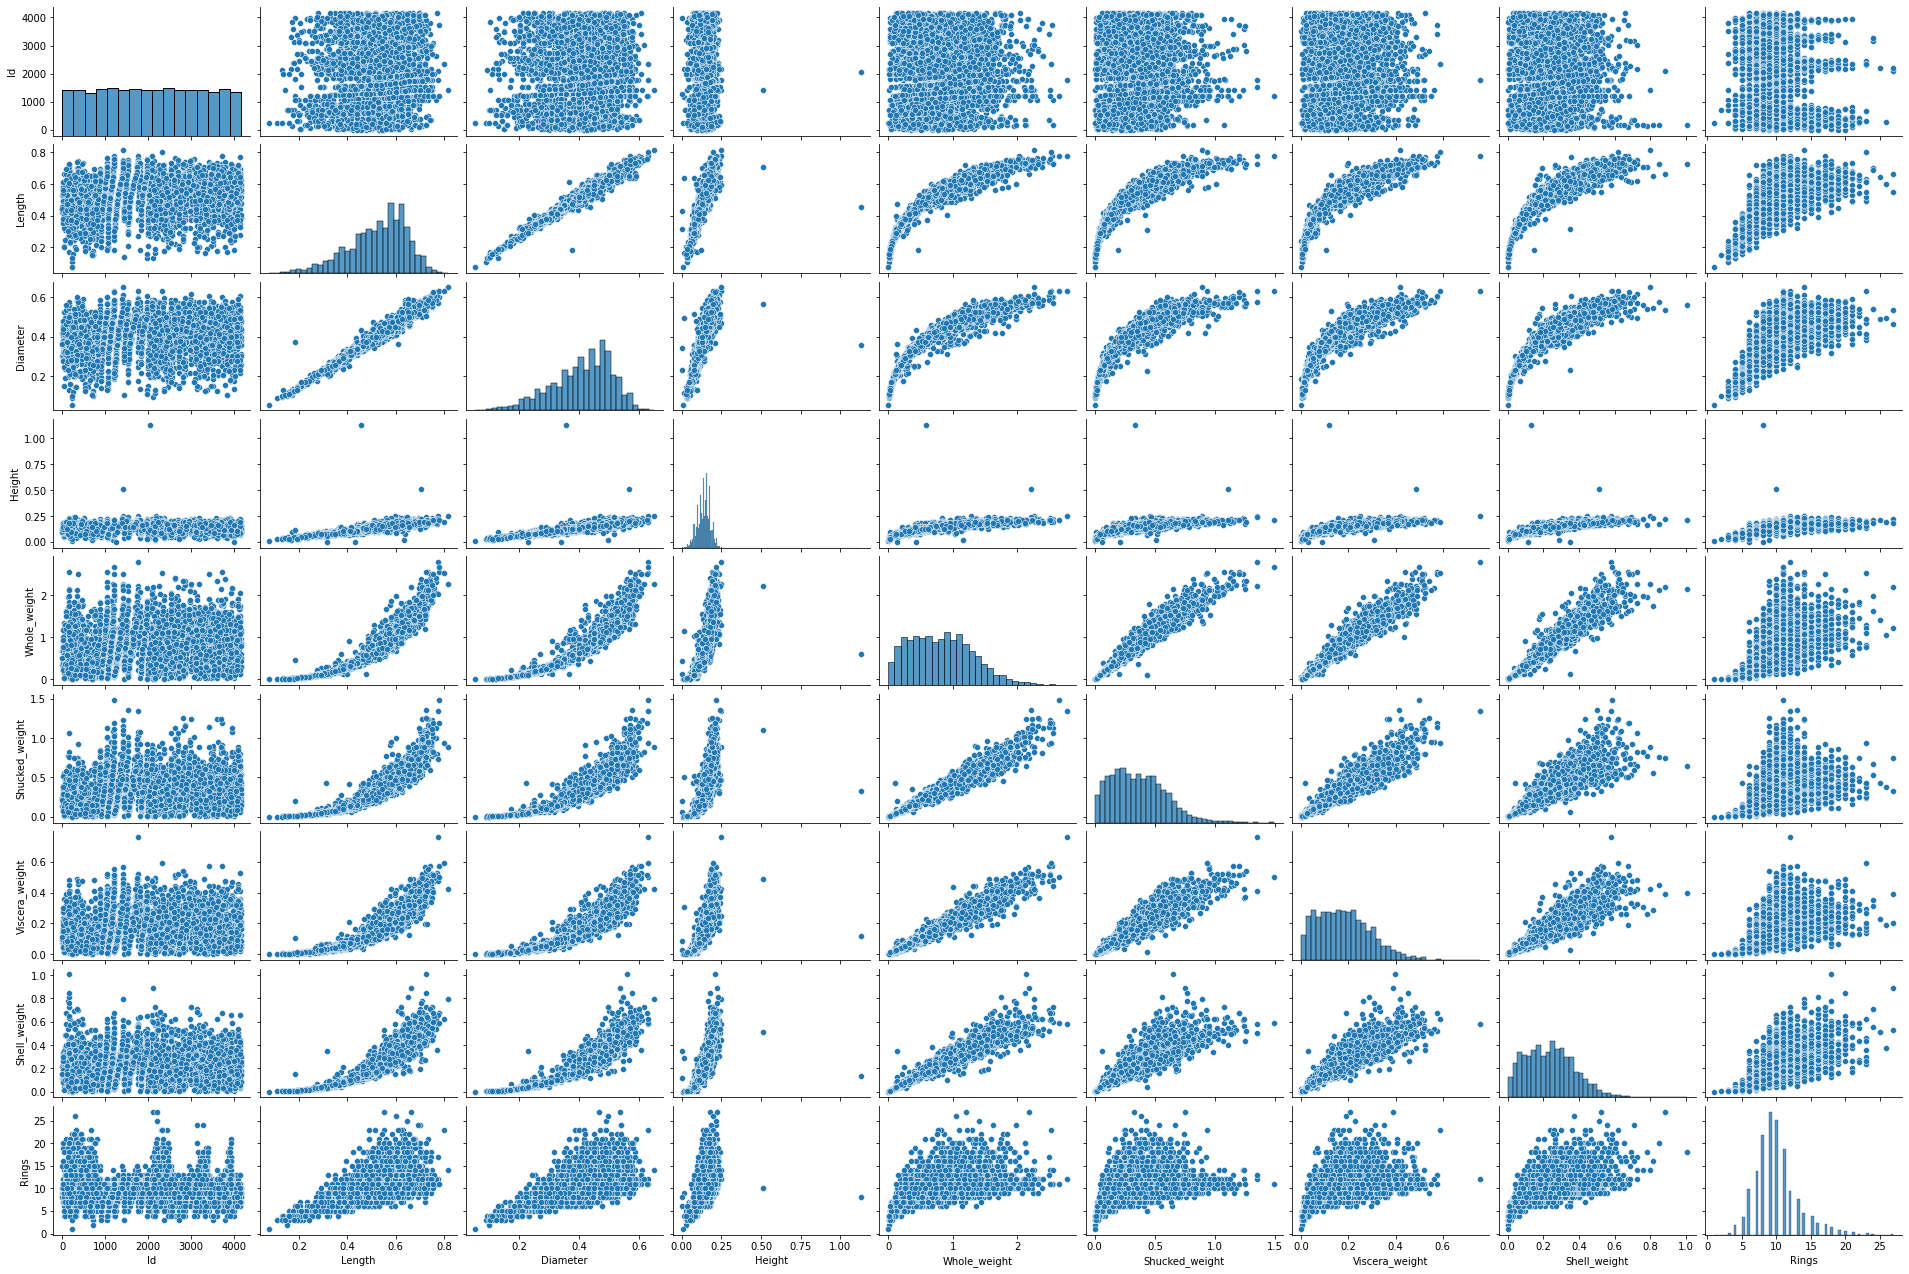

In [110]:
# size --> Refers the Height
# aspect --> Refers the Width

sns.pairplot(abalone_train, size = 2, aspect = 1.5)

### Calculating and plotting heatmap correlation

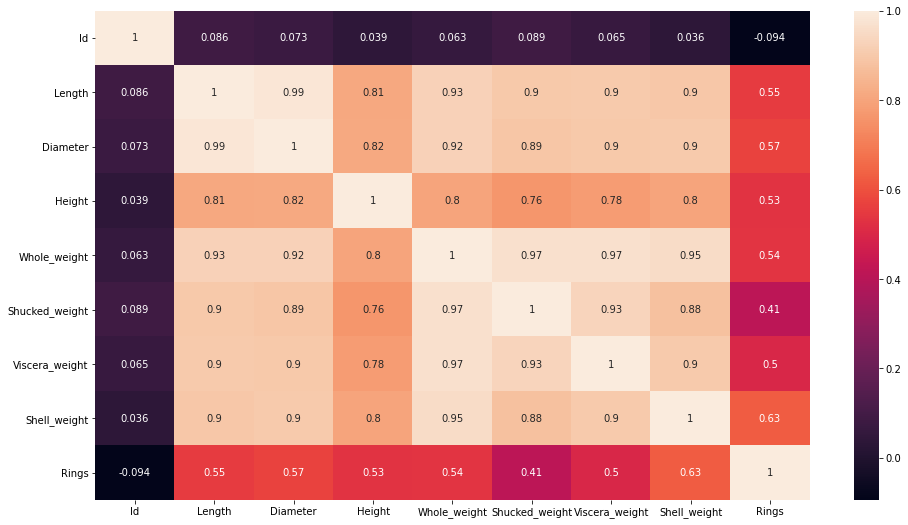

In [111]:
plt.figure(figsize = (16, 9))
sns.heatmap(abalone_train.corr(), annot=True);

__Observation__

- **Strong** relationship exists between each independent variables **Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, Shell_weight**. Hence, there is **NO Multicollinearity**.


- **No Weak** correlation between independent variables


- **Moderate** correlation exists between **all independent variables** and **Rings**


- Since there is a **Strong correlation** between independent variables, removing all columns except **Height**


- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1.


- Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.



In [112]:
abalone_train.drop(columns=['Id', 'Length', 'Diameter', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight'], axis=1, inplace=True)
abalone_train.head()

,Sex,Height,Rings
0,I,0.08000,5
1,I,0.05500,3
2,M,0.17000,15
3,M,0.20000,10
4,M,0.15500,14


In [113]:
abalone_data = pd.DataFrame()
abalone_data = pd.get_dummies(abalone_train, columns=['Sex'], drop_first=True)
abalone_data.head()

,Height,Rings,Sex_I,Sex_M
0,0.08000,5,1,0
1,0.05500,3,1,0
2,0.17000,15,0,1
3,0.20000,10,0,1
4,0.15500,14,0,1


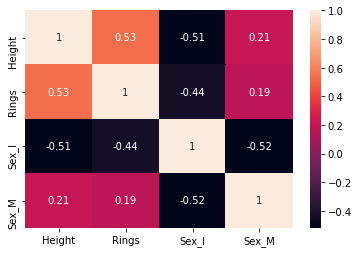

In [114]:
sns.heatmap(abalone_data.corr(), annot=True)

<a name = Section7></a>

---
# **5. Post Data Processing**
---



<a name = Section73></a>
### **5.1 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [115]:
feature_cols = ['Height', 'Sex_I', 'Sex_M']
X = abalone_data[feature_cols]                  # use the list to select a subset of the original DataFrame
X.head()

,Height,Sex_I,Sex_M
0,0.08000,1,0
1,0.05500,1,0
2,0.17000,0,1
3,0.20000,0,1
4,0.15500,0,1


In [116]:
y = abalone_data['Rings']
y.head()

0     5
1     3
2    15
3    10
4    14
Name: Rings, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split

def split(X, y):
  return train_test_split(X, y, test_size=0.20, random_state=1175)

In [118]:
X_train, X_test, y_train, y_test = split(X, y)

print('Train cases as below')
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('\nTest cases as below')
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

Train cases as below
X_train shape:  (2672, 3)
y_train shape:  (2672,)

Test cases as below
X_test shape:  (669, 3)
y_test shape:  (669,)


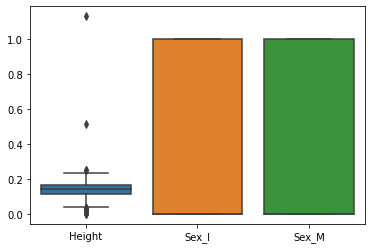

In [119]:
sns.boxplot(data=X_train)

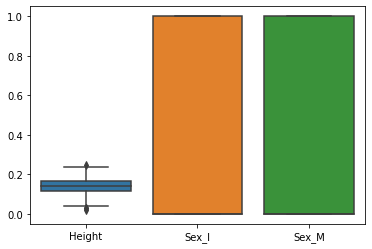

In [120]:
sns.boxplot(data=X_test)

In [121]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_trains = scaler.transform(X_train)
X_tests = scaler.transform(X_test)

In [122]:
pd.DataFrame(X_trains, columns=X_train.columns).head()

,Height,Sex_I,Sex_M
0,0.87805,0.00000,0.00000
1,0.58537,0.00000,1.00000
2,0.39024,0.00000,0.00000
3,-1.56098,1.00000,0.00000
4,0.48780,1.00000,0.00000


<a name = Section8></a>

---
# **6. Model Development & Evaluation**
---

- Develop Linear Regression model 

- **Analyze the results** obtained and **make our observations**.

- Focus on **MSE**, **MAE** and **RMSE** scores.

### **6.1 Linear regression in scikit-learn**

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. **Load** the `algorithm`

2. **Instantiate** and **Fit** the model to the `training` dataset

3. **Prediction** on the `test` set

4. **Calculating** Root mean square error 

<br> 
The code block given below shows how these steps are carried out:<br/>

```
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train) 
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
```

In [123]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_trains, y_train) 
y_pred_train = linreg.predict(X_trains) 
y_pred_test = linreg.predict(X_tests)

### **6.2 Interpreting Model Coefficients**

In [124]:
print('Intercept:', linreg.intercept_)          # print the intercept 
print('Coefficients:', linreg.coef_)

Intercept: 10.663267811680546
Coefficients: [ 1.50528077 -1.68006511 -0.14497622]


Its hard to remember the order of the feature names, we so we are __zipping__ the features to pair the feature names with the coefficients

In [125]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [126]:
eq2 = list(zip(feature_cols, coef))
print(eq2)

[('Intercept', 10.663267811680546), ('Height', 1.5052807667282575), ('Sex_I', -1.6800651071403223), ('Sex_M', -0.14497622031601187)]


In [127]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 10.663267811680546
Height 1.5052807667282575
Sex_I -1.6800651071403223
Sex_M -0.14497622031601187


__y = 10.66326 + 1.5053 `*` Height - 1.6801 `*` Sex_I - 0.1449 `*` Sex_M__

How do we interpret the Height coefficient (_1.5053_)

- A "unit" increase in Height is **associated with** a _"1.5053_ unit" increase in Rings.

Let's Plot and see how our model is predicting with the test data

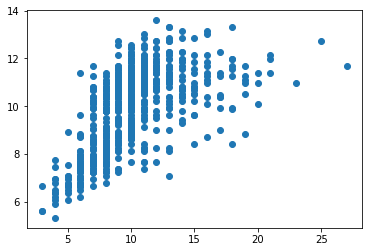

In [128]:
plt.scatter(y_test, y_pred_test)

Text(0, 0.5, 'Predicted Values')

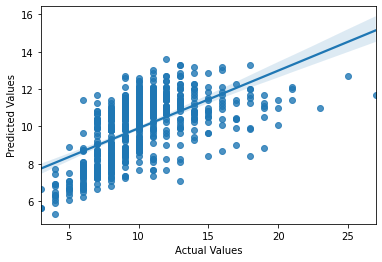

In [129]:
sns.regplot(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

## **6.3 Model evaluation** 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.

For example, if a model **predicts** that the **price** of apple is `Rs75/kg`, but the **actual price** of apple is `Rs100/kg`, then the **error** in prediction will be `Rs25/kg`.

Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [130]:
from sklearn import metrics

In [131]:
MAE_train = round(metrics.mean_absolute_error(y_train, y_pred_train), 4)
MAE_test = round(metrics.mean_absolute_error(y_test, y_pred_test), 4)

In [132]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 1.8627
MAE for test set is 1.8441


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [133]:
MSE_train = round(metrics.mean_squared_error(y_train, y_pred_train), 4)
MSE_test = round(metrics.mean_squared_error(y_test, y_pred_test), 4)

In [134]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 6.9859
MSE for test set is 6.986


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [135]:
RMSE_train = round(np.sqrt( metrics.mean_squared_error(y_train, y_pred_train)), 4)
RMSE_test = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)), 4)

In [136]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 2.6431
RMSE for test set is 2.6431


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 

- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.

- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.

<br>

#**RMSE is perfectly same for both Train & Test datasets and prefer to utilize the same for future Predictions**#

## **6.4 Using the Model for Prediction**

In [137]:
abalone_X_test = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/Term_3-Machine_Learning_Foundation/ML_Projects/abalone_test.csv') 
print('Data Shape:', abalone_X_test.shape)
abalone_X_test.head()

Data Shape: (836, 9)


,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,668,M,0.55000,0.42500,0.15500,0.91750,0.27750,0.24300,0.33500
1,1580,I,0.50000,0.40000,0.12000,0.61600,0.26100,0.14300,0.19350
2,3784,M,0.62000,0.48000,0.15500,1.25550,0.52700,0.37400,0.31750
3,463,I,0.22000,0.16500,0.05500,0.05450,0.02150,0.01200,0.02000
4,2615,M,0.64500,0.50000,0.17500,1.51050,0.67350,0.37550,0.37750


In [138]:
abalone_test_ID = pd.DataFrame(abalone_X_test["Id"])
abalone_test_ID.head()

,Id
0,668
1,1580
2,3784
3,463
4,2615


In [139]:
abalone_X_test = abalone_X_test[['Sex', 'Height']]
abalone_X_test.head()

,Sex,Height
0,M,0.15500
1,I,0.12000
2,M,0.15500
3,I,0.05500
4,M,0.17500


In [140]:
abalone_test_data = pd.DataFrame()
abalone_test_data = pd.get_dummies(abalone_X_test, columns=['Sex'], drop_first=True)
abalone_test_data.head()

,Height,Sex_I,Sex_M
0,0.15500,0,1
1,0.12000,1,0
2,0.15500,0,1
3,0.05500,1,0
4,0.17500,0,1


In [141]:
abalone_X_test = abalone_test_data.copy()
abalone_X_test.head()

,Height,Sex_I,Sex_M
0,0.15500,0,1
1,0.12000,1,0
2,0.15500,0,1
3,0.05500,1,0
4,0.17500,0,1


In [142]:
abalone_tests_data = scaler.transform(abalone_X_test)
y_pred_abalone_test = linreg.predict(abalone_tests_data)
y_pred_abalone_test = pd.DataFrame(y_pred_abalone_test)

In [143]:
y_pred_abalone_test.columns = ["Rings"]
y_pred_abalone_test["Rings"] = y_pred_abalone_test["Rings"].astype(int)
y_pred_abalone_test.head()

,Rings
0,10
1,8
2,10
3,6
4,11


In [144]:
y_pred_abalone_test = pd.concat([abalone_test_ID["Id"], pd.DataFrame(y_pred_abalone_test)["Rings"]], axis=1)
y_pred_abalone_test.head()

,Id,Rings
0,668,10
1,1580,8
2,3784,10
3,463,6
4,2615,11


In [145]:
y_pred_abalone_test.to_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/Term_3-Machine_Learning_Foundation/ML_Projects/abalone_output.csv', index=False, header=False)

<a name = Section9></a>

---
# **7. Conclusion**
---

- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- The best **Linear Regression** model for this dataset is found with **Random State = 1175** for **80-20** train-test split.
